<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Paula Daniela Cárdenas Gallardo y Paulo Adrián Villa Domínguez

**Fecha:** 7 de marzo del 2023

**Expediente** : `733720` y `733773`
    
**Profesor:** Óscar David Jaramillo Zuluaga.
    
**Link Github**: [github.com](https://github.com/paucardenasg/ProyectoConjunto_PDCARDENAS_PAVILLA)

# Tarea 4: Clase 11

## Enunciado de tarea
> + Construir una red neuronal MLP multivariada. Para esto, tomar todas las variables incluidas en nuestro dataset.
> + Construir una red neuronal MLP multivariada, pero en este caso sólo considerar las variables adecuadas y descartar aquellas que no aportan mucha información o que son redundantes para cuantificar el efecto de estas variables redundantes. <br>
> Nota: Para poder saber cuales variables incluir en el modelo y cuales rechazar una opción es analizar la correlación de pearson y la otra usando pruebas estadísiticas con las siguientes paqueterías: <br>
`from sklearn.feature_selection import SelectKBest` <br>
`from sklearn.feature_selection import f_regression` <br>
> Luego del paso 3, crear el mismo modelo pero en este caso implementar técnicas de regularización EarlyStoppin y dropout. Investigar como se pueden implementar estas estrategias en tensorflow.

### Ejercicio 1: Construir una red neuronal MLP multivariada. Para esto, tomar todas las variables incluidas en nuestro dataset.

Código de solución estudiante 1

In [1]:
# Librerías
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

Cargando los datos divididos desde `keras`

In [2]:
# Cargar datos
(train_data, train_labels), (test_data, test_labels) = keras.datasets.boston_housing.load_data()

In [3]:
# Poner una semilla para replicar resultados
tf.random.set_seed(42)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=50, 
    batch_size=32, 
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
mse_1, mae_1 = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', mse_1)
print('Error absoluto medio en el conjunto de prueba:', mae_1)

4/4 [==============================] - 0s 4ms/step - loss: 304.0905 - mae: 15.4106
Error cuadrático medio en el conjunto de prueba: 304.09051513671875
Error absoluto medio en el conjunto de prueba: 15.41055679321289


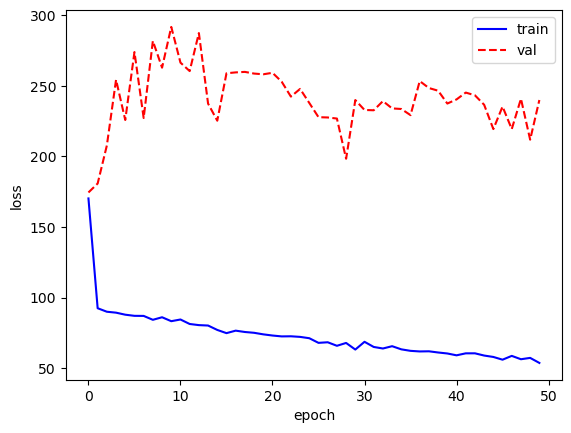

In [5]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

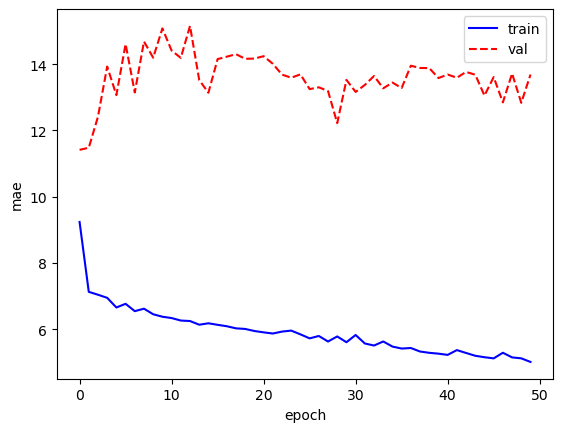

In [6]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [7]:
predicted = model.predict(test_data)

4/4 [==============================] - 0s 2ms/step


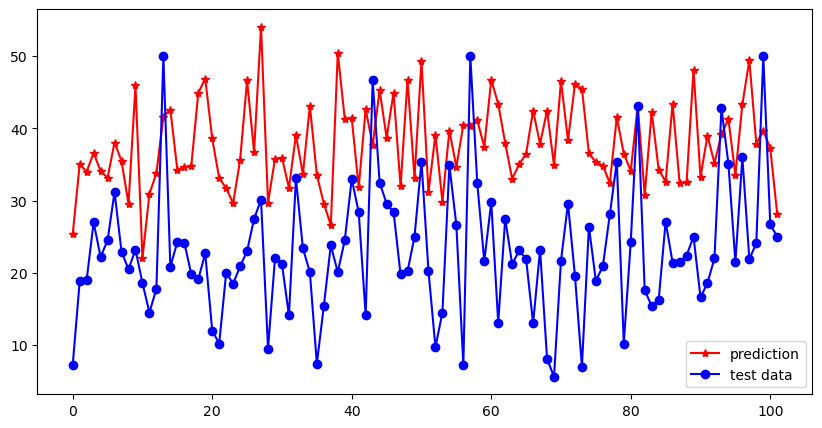

In [8]:
plt.figure(figsize=(10,5))
plt.plot(predicted, 'r*-', label='prediction')
plt.plot(test_labels, 'bo-', label='test data')

plt.legend()
plt.show()

Concatenando todos los datos y después haciendo la división para entrenamiento y prueba

In [9]:
# Analizar la data completa
columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV',
]

X = np.vstack([train_data, test_data])
y = np.hstack([train_labels, test_labels]).reshape(-1, 1)
data = pd.DataFrame(np.concatenate((X, y), axis=1), columns=columns)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [10]:
target = 'MEDV'
predictors = [col for col in data.columns if col != target]
TEST_SIZE = int(0.2 * data.shape[0])
TRAIN_SIZE = data.shape[0] - TEST_SIZE

t = np.arange(1, data.shape[0] + 1)
train_data, test_data = data[predictors][:TRAIN_SIZE], data[predictors][TRAIN_SIZE:]
train_labels, test_labels = data[target][:TRAIN_SIZE], data[target][TRAIN_SIZE:]
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((405, 13), (101, 13), (405,), (101,))

In [11]:
# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=15, 
    batch_size=32, 
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
mse_2, mae_2 = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', mse_2)
print('Error absoluto medio en el conjunto de prueba:', mae_2)

4/4 [==============================] - 0s 3ms/step - loss: 85.3775 - mae: 7.0805
Error cuadrático medio en el conjunto de prueba: 85.37753295898438
Error absoluto medio en el conjunto de prueba: 7.080482006072998


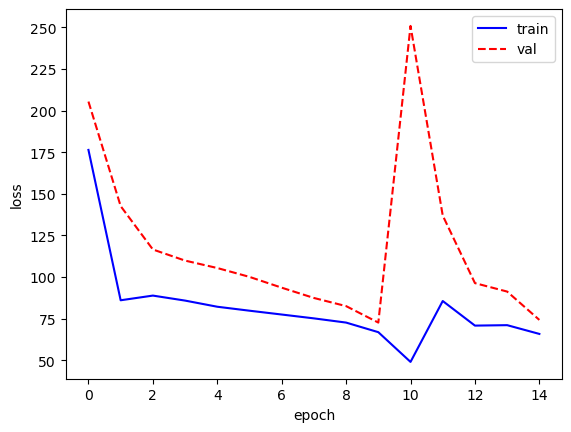

In [13]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

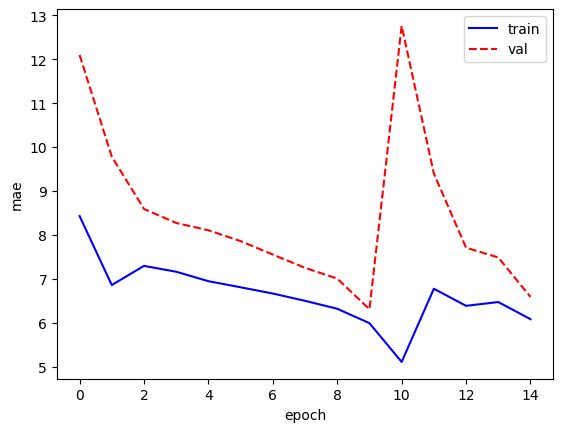

In [14]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [15]:
predicted = model.predict(test_data)

4/4 [==============================] - 0s 4ms/step


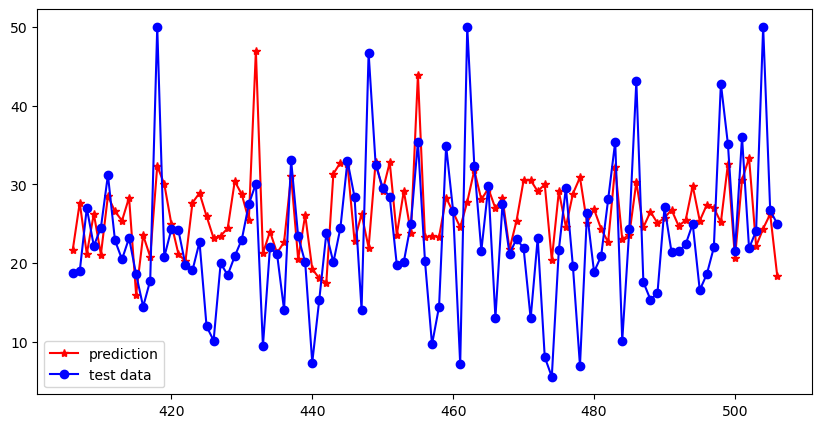

In [16]:
plt.figure(figsize=(10,5))
plt.plot(t[TRAIN_SIZE:], predicted, 'r*-', label='prediction')
plt.plot(t[TRAIN_SIZE:], test_labels, 'bo-', label='test data')

plt.legend()
plt.show()

Código de solución estudiante 2

In [17]:
# Código de solución estudiante 2


___
### Ejercicio 2: Construir una red neuronal MLP multivariada, pero en este caso sólo considerar las variables adecuadas y descartar aquellas que no aportan mucha información o que son redundantes para cuantificar el efecto de estas variables redundantes.

Código de solución estudiante 1

In [18]:
from sklearn.feature_selection import SelectKBest, f_regression

In [19]:
train_data.shape

(405, 13)

In [20]:
model = SelectKBest(score_func=f_regression, k=8)
results = model.fit(train_data, train_labels)
results.get_feature_names_out(input_features=None)

array(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT'],
      dtype=object)

In [21]:
# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                896       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=15, 
    batch_size=32, 
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
mse_3, mae_3 = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', mse_3)
print('Error absoluto medio en el conjunto de prueba:', mae_3)

4/4 [==============================] - 0s 3ms/step - loss: 171.1403 - mae: 10.6265
Error cuadrático medio en el conjunto de prueba: 171.1402587890625
Error absoluto medio en el conjunto de prueba: 10.626542091369629


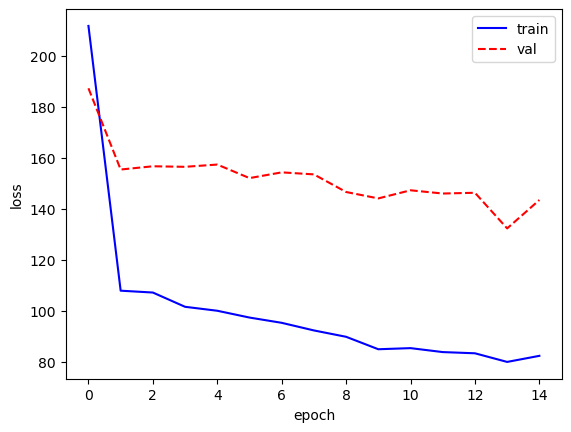

In [23]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

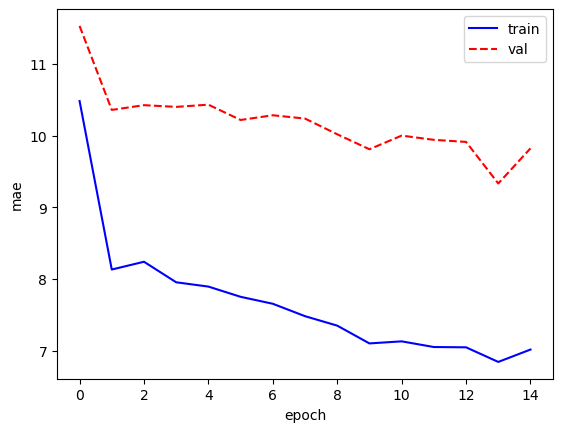

In [24]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [25]:
predicted = model.predict(test_data)

4/4 [==============================] - 0s 3ms/step


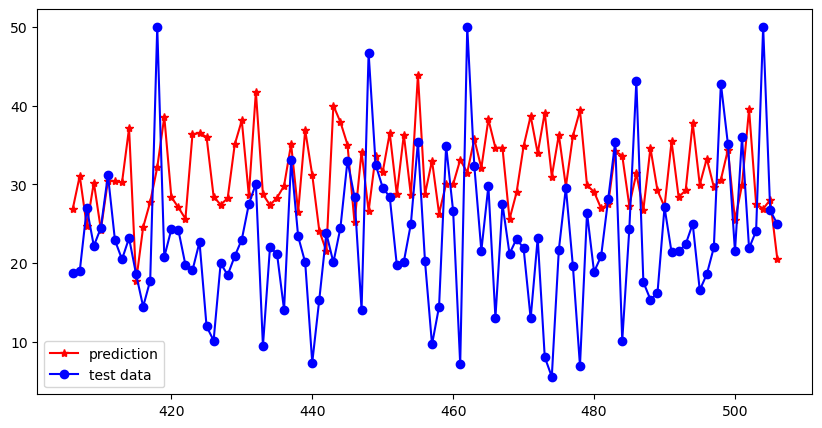

In [26]:
plt.figure(figsize=(10,5))
plt.plot(t[TRAIN_SIZE:], predicted, 'r*-', label='prediction')
plt.plot(t[TRAIN_SIZE:], test_labels, 'bo-', label='test data')
plt.legend()
plt.show()

Código de solución estudiante 2

___
### Ejercicio 3:  Crear el mismo modelo pero en este caso implementar técnicas de regularización `EarlyStoppin` y `dropout`.

Código de solución estudiante 1

In [27]:
# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                896       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Generar callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.1, patience=3)

In [29]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=15, 
    batch_size=32, 
    verbose=0,
    callbacks=early_stop
)

# Evaluar el modelo en el conjunto de prueba
mse_4, mae_4 = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', mse_4)
print('Error absoluto medio en el conjunto de prueba:', mae_4)

4/4 [==============================] - 0s 7ms/step - loss: 131.7338 - mae: 9.6071
Error cuadrático medio en el conjunto de prueba: 131.73377990722656
Error absoluto medio en el conjunto de prueba: 9.60714340209961


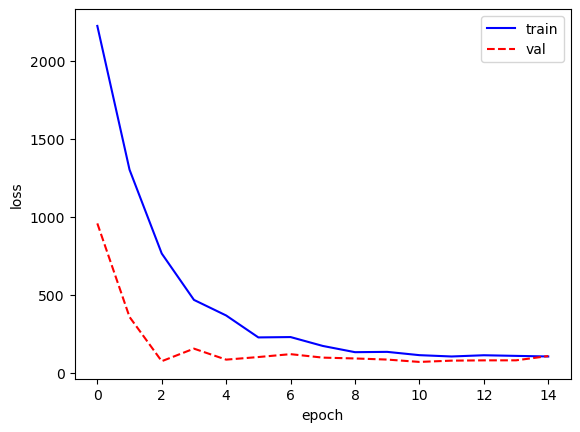

In [30]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

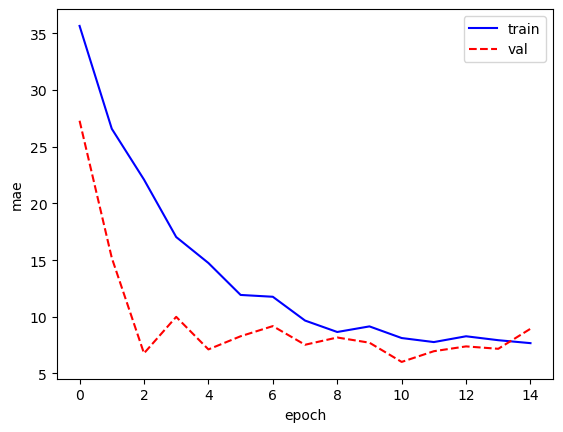

In [31]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [32]:
predicted = model.predict(test_data)

4/4 [==============================] - 0s 3ms/step


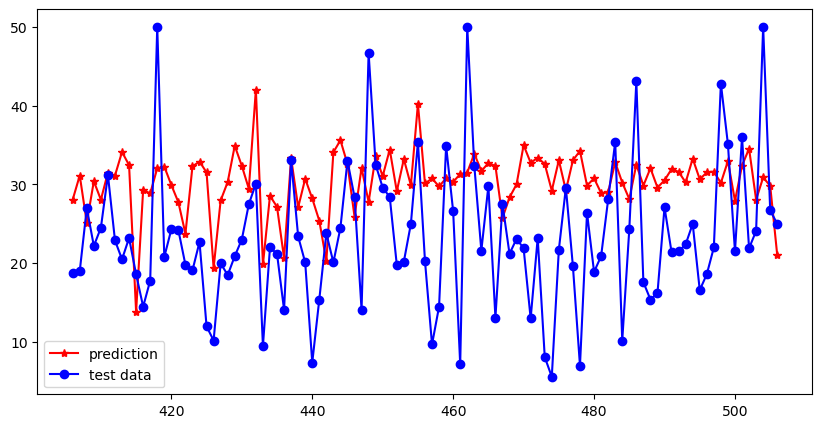

In [33]:
plt.figure(figsize=(10,5))
plt.plot(t[TRAIN_SIZE:], predicted, 'r*-', label='prediction')
plt.plot(t[TRAIN_SIZE:], test_labels, 'bo-', label='test data')
plt.legend()
plt.show()

In [34]:
# Comparar resultados
results= {'Ejercicio': ['1.1', '1.2', '2', '3'], 'MSE': [mse_1, mse_2, mse_3, mse_4], 'MAE': [mae_1, mae_2, mae_3, mae_4]}
results= pd.DataFrame(results)
results

,Ejercicio,MSE,MAE
0,1.1,304.090515,15.410557
1,1.2,85.377533,7.080482
2,2,171.140259,10.626542
3,3,131.733780,9.607143


Código de solución estudiante 2